c:\Users\user\miniconda3\envs\rag_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\envs\rag_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\envs\rag_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                               precision    recall  f1-score   support

             anlamadım_yinele       0.00      0.00      0.00         1
           basortulu_fotograf       1.00      1.00      1.00         9
      basvuru_kilavuzu_edinme       1.00      1.00      1.00         9
    basvuru_merkezinden_yapma       1.00      1.00      1.00        23
   basvuru_sartlari_sorgulama       1.00      1.00      1.00         9
               basvuru_sorusu       1.00      0.80      0.89         5
  basvuru_tarihleri_sorgulama       1.00      1.00      1.00         9
     basvuru_ucreti_sorgulama       1.00      1.00      1.00         9
       basvuru_yapma_bireysel       1.00      1.00      1.00         9
                 belge_talebi       1.00      1.00      1.00         3
        engelli_salon_basvuru       0.94      1.00      0.97        16
          gazi_sehit_muafiyet       1.00      1.00      1.00        25
                  gec_basvuru       0.96      1.00      0.98        23
     

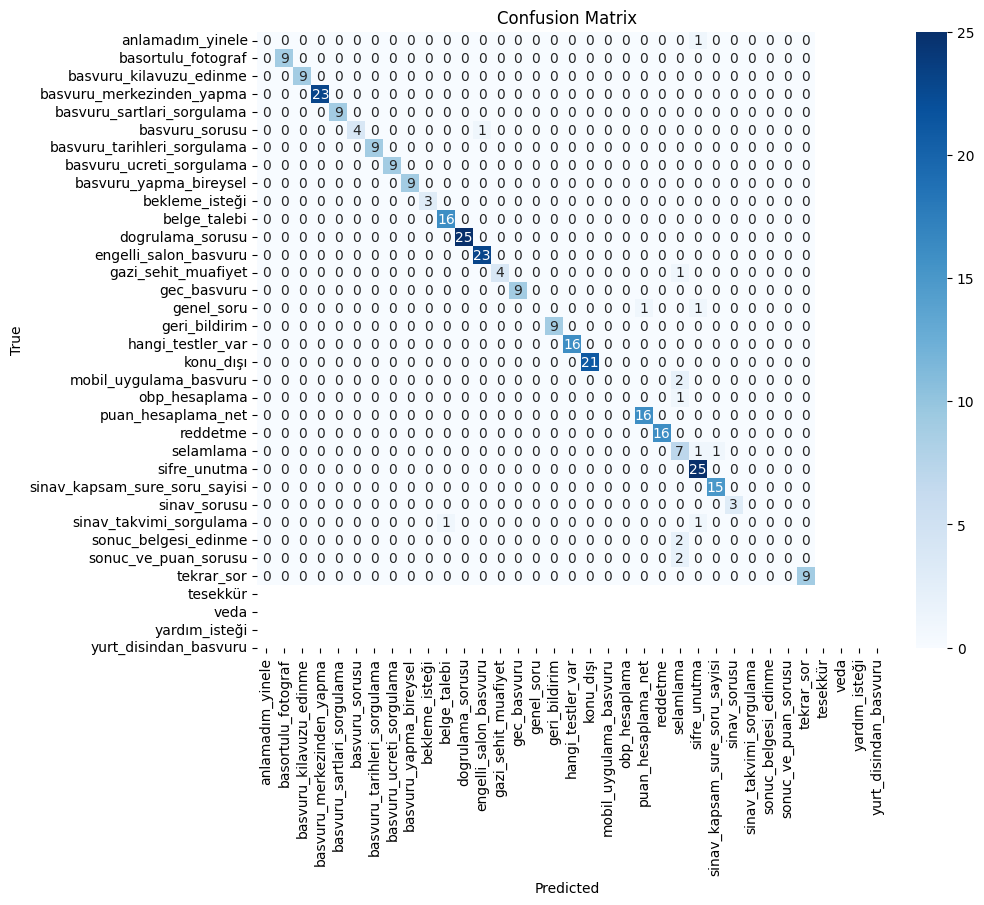

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Veri Yükleme (Intent datası)
df = pd.read_excel("../data/chatbot_dataset.xlsx")
df = df.dropna()

# Veri setini eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(
    df["user_message"], df["Intent"], test_size=0.2, random_state=42, stratify=df["Intent"]
)

# TF-IDF vektörleştirici ile vektöre dönüştür
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Etiketleri encode et
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Modeli eğit
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train_enc)

# Tahmin yap
y_pred = clf.predict(X_test_tfidf)

# Rapor yazdır
import numpy as np

# Test setindeki mevcut sınıf ID'lerini al
unique_labels = np.unique(y_test_enc)

# Raporu bu sınıflara göre hesapla
print(classification_report(y_test_enc, y_pred, labels=unique_labels, target_names=le.inverse_transform(unique_labels)))
#print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion Matrix (İsteğe bağlı)
cm = confusion_matrix(y_test_enc, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Yukarıdaki eğitimde tf-idf kullanıldı fakat embedding ile daha iyi sonuçlar elde edildiği için bu kısımda embedding kullanacağız.

# Intent Sınıflandırma (Embedding + LogisticRegression)
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib

# Veri Yükleme (Intent datası)
df = pd.read_excel("../data/chatbot_dataset.xlsx")
df = df.dropna()

# Embedding modeli
embedding_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
X = embedding_model.encode(df["user_message"].tolist())
le = LabelEncoder()
y = le.fit_transform(df["Intent"])

# Model Eğitim
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

# Kaydet
joblib.dump(clf, "../data/intent_classifier.joblib")
joblib.dump(le, "../data/label_encoder.joblib")

# Tahmin Fonk.
def predict_intent(text):
    vec = embedding_model.encode([text])
    pred = clf.predict(vec)
    return le.inverse_transform(pred)[0]

c:\Users\user\miniconda3\envs\rag_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#FAISS İndex Oluşturma (PDF)
from langchain_community.document_loaders import PyPDFLoader

# PDF yükleme
loader = PyPDFLoader("../data/sss.pdf")
docs = loader.load()

In [3]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Chunking
splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=50)
chunks = splitter.split_documents(docs)

In [4]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

embedding = OpenAIEmbeddings(model="text-embedding-3-large")
vectorstore = FAISS.from_documents(chunks, embedding)

C:\Users\user\AppData\Local\Temp\ipykernel_7572\3849669498.py:5: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embedding = OpenAIEmbeddings(model="text-embedding-3-large")


In [5]:
len(chunks)
vectorstore.save_local("../data/faiss_index", index_name="index")

In [6]:
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

retriever = vectorstore.as_retriever(
    search_type="similarity", search_kwargs={"k": 7}
)

In [7]:
retieved_docs = retriever.invoke(" YKS 2025 ne zaman yapılacak?")

In [10]:
print(retieved_docs[5].page_content)

yerleştirmelerle ilgili olarak alınan yeni kararlar ve gerekli görülen değişikliklere ilişkin bilgiler, ÖSYM’nin internet sayfasından 
kamuoyuna duyurulacaktır. Bu nedenle, ilgililerin ÖSYM’nin internet sayfasını sık sık kontrol etmeleri yararlarına olacaktır. 
Yükseköğretim Kurumları Sınavı (YKS) Başvuru Tarihleri  : 6 Şubat-3 Mart 2025 (Ücret ödeme için son gün, 4 Mart 2025)  
YKS 1. Oturum Temel Yeterlilik Testi (TYT) Tarihi,   
Sınav Saati ve Sınav Süresi    : 21 Haziran 2025 (Cumartesi),  10.15,  165 dakika 
YKS 2. Oturum Alan Yeterlilik Testleri (AYT) Tarihi,   
Sınav Saati ve Sınav Süresi    : 22 Haziran 2025 (Pazar),  10.15,  180 dakika


In [11]:
from dotenv import load_dotenv

load_dotenv()

True

In [12]:
from langchain_openai import ChatOpenAI
llmGPT = ChatOpenAI(
    model="gpt-4o", 
    temperature=0.3,
    max_tokens=500
)

In [14]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains import create_retrieval_chain

# Prompt
system_prompt = (
    " Ölçme, Seçme ve Yerleştirme Merkezi Başkanlığı (ÖSYM) hakkında uzman bir yardımcı botsun."
    "Kullanıcıdan gelen sorulara aşağıda verilen içerikleri kullanarak doğru cevaplar ver. "
    "Verdiğin cevaplar toplu maddeler halinde ve net olmalı. "
    "Eğer cevap içeriğin içinde yoksa, bunu dürüstçe belirt. "
    "Yanıtlarını en fazla üç cümlede kısa ve öz şekilde ver.\n\n{context}"
)

prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", "{input}")
])

# QA Zinciri
question_answer_chain = create_stuff_documents_chain(llmGPT, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

In [15]:
# Tüm Akış (Intent + RAG + Gemini)
def full_pipeline(user_question):
    intent = predict_intent(user_question)
    print(f"Intent: {intent}")

    # Konu dışı veya tanınmayan intent geldiğinde sabit cevap ver
    if intent in ["konu_dışı", "unknown"]:
        answer = "\n Bu konuda yardımcı olamıyorum. Lütfen ÖSYM sitesi hakkında bir soru sorunuz."
        print(f"\n Yanıt: {answer}\n")
        return

    # Diğer intent'lerde RAG zinciri çalıştırılır
    response = rag_chain.invoke({"input": user_question})
    answer = response.get("answer")
    print(f"\n Yanıt: {answer}\n Kaynak: GPT + PDF")


In [16]:
# Örnek soru
full_pipeline("coldplay kimdir?")  

Intent: sinav_sorusu

 Yanıt: Bu konuda size yardımcı olamam. ÖSYM ile ilgili başka bir sorunuz varsa sormaktan çekinmeyin.
 Kaynak: GPT + PDF


In [17]:
# Test
full_pipeline("2025 YKS başvuru tarihleri nedir?")

Intent: gec_basvuru

 Yanıt: 2025-YKS başvuru tarihleri 6 Şubat - 3 Mart 2025 tarihleri arasındadır.
 Kaynak: GPT + PDF


In [20]:
test_questions = [
    "YKS başvuruları ne zaman başlıyor?",
    "Sınav ücretleri ne kadar?",
    "Geç başvuru tarihi nedir?"
]

reference_answers = [
    "2025-YKS başvuruları 6 Şubat - 3 Mart 2025 tarihleri arasında",
    "Sınav ücreti sadece TYT 450 TL'dir.TYT+AYT veya YDT için 900 TL'dir.",
    "Geç başvuru tarihleri 11-13 Mart 2025'tir."
]

#gpt_answers = [full_pipeline(q) for q in test_questions]

gpt_answers = [
    "2025-YKS başvuruları 6 Şubat 2025 tarihinde başlayacak ve 3 Mart 2025 tarihinde sona erecektir.",
    "Sadece TYT’ye girecek adaylar 450,00 TL,"
    "- TYT ile birlikte AYT veya YDT’den herhangi birine girmek isteyen adaylar 900,00 TL,"
    "- TYT, AYT ve YDT’nin tümüne girmek isteyen adaylar ise 1350,00 TL yatıracaklardır.",
    "2025-YKS için geç başvuru tarihleri 11-13 Mart 2025'tir. Bu tarihlerde başvuru yapacak adaylar,"
    " sınav ücretini sadece ÖSYM’nin internet adresinden kredi kartı/banka kartı ile ödemelidir. "
    "Bankalardan ücret ödemesi yapılmamalıdır."
]
from evaluate import load
bertscore = load("bertscore")

gpt_scores = bertscore.compute(predictions=gpt_answers, references=reference_answers, lang="tr")

# BERTScore hesaplama
print("GPT BERTScore F1:", sum(gpt_scores["f1"])/len(gpt_scores["f1"]))
print("GPT BERTScore Precision:", sum(gpt_scores["precision"])/len(gpt_scores["precision"]))
print("GPT BERTScore Recall:", sum(gpt_scores["recall"])/len(gpt_scores["recall"]))


GPT BERTScore F1: 0.7093895077705383
GPT BERTScore Precision: 0.6325037678082784
GPT BERTScore Recall: 0.8214871088663737
